In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import jax
import jax.numpy as jnp
import visualization
from utils import results, experiments, settings, equioutput
import os
import global_settings
import matplotlib
rng_key, rng_key_ = jax.random.split(jax.random.PRNGKey(0))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
result = results.ResultSample.load_from_file(
    os.path.join(
        global_settings.PATH_PAPER_RESULTS,
        "{}.tar.gz".format(
            # 1, 3
            "6414c528c5f8cc0c9f08578de5fb1dbc" # sinusoidal
            #"e851ba9827843f1e59e7369eb2bf4c91" # izmailov
            #"8a230f135f7b260f93605b6a86792887" # regression2d
            #"56979997b79aee53358f54ab83744a40" # airfoil
            #"4b7feaf16650a91b2aa9dcb6c9e050ef" # concrete
            #"f080a1a860b0bd3fb634d896d425f188" # diabetes
            #"5946d6a0855fbf1f537f500cf21c52c1" # energy
            #"4025c365e874ac9da74267ae6a61a44b" # forest_fire
            #"15e48cdb7200d362fd2d7e86e0b8776f" # wine
            #"a3d7403396b047211ec7a86f39015bb8" # yacht
            
            # 1, 3
            #"6414c528c5f8cc0c9f08578de5fb1dbc" # sinusoidal
            # 1, 16
            #"74bac4f5529d37d7d94430b21e15b4ad" # izmailov
        )
    )
)
experiment = experiments.FactoryExperiment(result.experiment_type, **{"settings": result.settings})()
print(experiment._settings)

SettingsExperimentSample(output_path='/u/halle/wiese/home_at/data/experiments/paper/results', dataset='sinusoidal', dataset_normalization='standardization', hidden_layers=1, hidden_neurons=3, activation='tanh', activation_last_layer='none', num_warmup=1024, statistic='reduced', statistic_p=0.99, samples_per_chain=1, identifiable_modes=3, pool_size=16, seed=0, overwrite_chains=None)


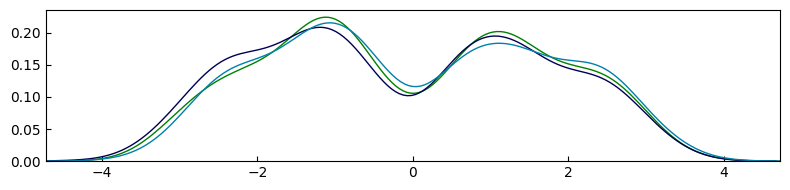

In [18]:
# step 0
subspace = jnp.load("subspace_0_0_sinusoidal_1x3.npy")

figure = visualization.PaperFigureBivariate(
    settings=settings.SettingsPaperFigureBivariate(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.4,
            size=1.0
        ),
        label_size=16,
        cmap=matplotlib.cm.get_cmap("ocean")
    )
)
#figure.plot(data_list=list(subspace.transpose(1, 0, 2)),scatter_index_0=1, scatter_index_1=2, univariate_index=1,labels=[r"$w_{31i}$", r"$w_{2i1}$"], rasterized=True, univariate=False)
figure.plot(data_list=list(subspace.transpose(1, 0, 2)),scatter_index_0=1, scatter_index_1=2, univariate_index=1,labels=[r"$w_{31i}$", r""],rasterized=False, univariate=True)

In [19]:
#figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "removal_progress_0.pdf"), bbox_inches="tight", dpi=300, transparent=True)
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "removal_progress_0_univariates.pdf"), bbox_inches="tight", dpi=300, transparent=True)

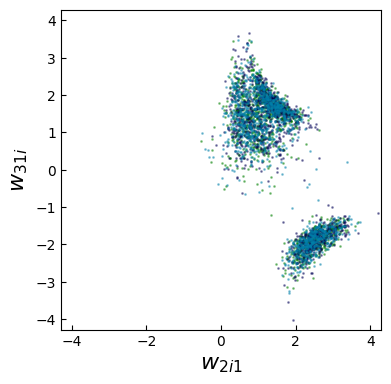

In [20]:
# step 1
subspace = jnp.load("subspace_0_1_sinusoidal_1x3.npy")

figure = visualization.PaperFigureBivariate(
    settings=settings.SettingsPaperFigureBivariate(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.4,
            size=1.0
        ),
        label_size=16,
        cmap=matplotlib.cm.get_cmap("ocean")
    )
)
figure.plot(data_list=list(subspace.transpose(1, 0, 2)),scatter_index_0=1, scatter_index_1=2, univariate_index=1,labels=[r"$w_{31i}$", r"$w_{2i1}$"],rasterized=True, univariate=False)

In [21]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "removal_progress_1.pdf"), bbox_inches="tight", dpi=300, transparent=True)

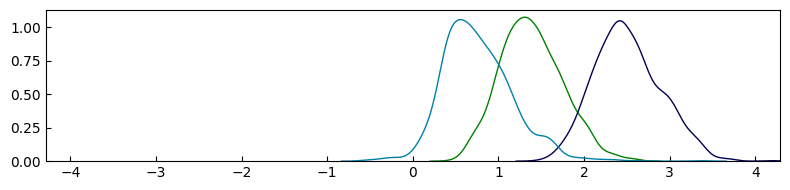

In [24]:
# step 2
subspace = jnp.load("subspace_0_2_sinusoidal_1x3.npy")

figure = visualization.PaperFigureBivariate(
    settings=settings.SettingsPaperFigureBivariate(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=settings.SettingsScatter(
            alpha=0.4,
            size=1.0
        ),
        label_size=16,
        cmap=matplotlib.cm.get_cmap("ocean")
    )
)
#figure.plot(data_list=list(subspace.transpose(1, 0, 2)),scatter_index_0=1, scatter_index_1=2, univariate_index=1,labels=[r"$w_{31i}$", r"$w_{2i1}$"], rasterized=True, univariate=False)
figure.plot(data_list=list(subspace.transpose(1, 0, 2)),scatter_index_0=1, scatter_index_1=2, univariate_index=1,labels=[r"$w_{31i}$", r""],rasterized=False, univariate=True)

In [25]:
#figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "removal_progress_2.pdf"), bbox_inches="tight", dpi=300, transparent=True)
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "removal_progress_2_univariates.pdf"), bbox_inches="tight", dpi=300, transparent=True)

samples_parameters_fs.shape (1274, 10)


0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████| 1024/1024 [00:05<00:00, 202.35it/s]


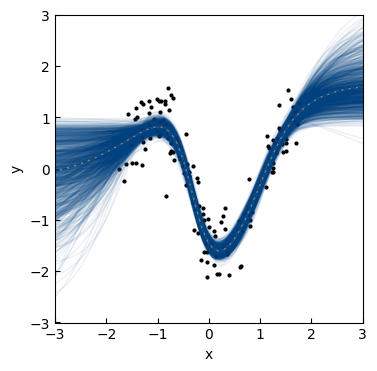

In [28]:
samples_parameters_fs = jax.random.permutation(rng_key_, result.samples["parameters"])
print("samples_parameters_fs.shape", samples_parameters_fs.shape)

n = 2**10
if len(experiment._dataset.conditional_indices) > 1:
    n = 2**4

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=0.08,
            epistemic=False,
            cmap=matplotlib.cm.get_cmap("ocean")
        ),
        ax_width=4.0,
        ax_height=4.0
    )
)
figure.plot(
    dataset=experiment._dataset,
    transformation=experiment._model_transformation.apply_from_vector,
    parameters_list=[samples_parameters_fs[:0], samples_parameters_fs[:n]],
    std=result.samples["std"].mean(),
    rasterized=True
)

In [29]:
figure._figure.savefig(os.path.join(global_settings.PATH_FIGURES, "{}_{}_removal_progress_fs_space.png".format(
    result.identifier,
    result.settings.dataset
)), bbox_inches="tight", dpi=300, transparent=True)

In [5]:
sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
structured_sequential_samples_parameters = sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=result.samples["parameters"]
)
symmetry_helper = equioutput.SymmetryHelper(structured_sequential_samples_parameters)

In [6]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
print(subspace_0.shape)
jnp.save("subspace_0_0_sinusoidal_1x3.npy", subspace_0)

(1274, 3, 3)


In [7]:
symmetry_helper.remove_tanh_symmetries(layer=0, tanh_planes=1)

epoch: 0,  loss: 1.7823727130889893, normal l2 norm: 1.6500684022903442
epoch: 1,  loss: 1.7465838193893433, normal l2 norm: 1.1708775758743286
epoch: 2,  loss: 1.3464149236679077, normal l2 norm: 1.2848560810089111
epoch: 3,  loss: 1.0792351961135864, normal l2 norm: 1.051392912864685
epoch: 4,  loss: 0.974834144115448, normal l2 norm: 1.0846494436264038
epoch: 5,  loss: 0.9551436305046082, normal l2 norm: 1.1041326522827148
epoch: 6,  loss: 0.9497705698013306, normal l2 norm: 1.0635932683944702
epoch: 7,  loss: 0.9459287524223328, normal l2 norm: 1.0781646966934204
epoch: 8,  loss: 0.9299535155296326, normal l2 norm: 1.0697230100631714
epoch: 9,  loss: 0.93080735206604, normal l2 norm: 1.031029462814331
epoch: 10,  loss: 0.919228196144104, normal l2 norm: 1.0003843307495117
epoch: 11,  loss: 0.9190394282341003, normal l2 norm: 1.0365816354751587
epoch: 12,  loss: 0.9187958240509033, normal l2 norm: 1.0273630619049072
epoch: 13,  loss: 0.9133725762367249, normal l2 norm: 1.03526115417

In [8]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
print(subspace_0.shape)
jnp.save("subspace_0_1_sinusoidal_1x3.npy", subspace_0)

(1274, 3, 3)


In [9]:
symmetry_helper.remove_permutation_symmetries(layer=0, iterations=256, similarity_matrix="rbf", k=1024)

100%|███████████████████████████████████████████████████████████████████████████████████████| 3822/3822 [00:39<00:00, 96.06it/s]


0 2546
1 1889
2 1317
3 663
4 322
5 190
6 107
7 59
8 26
9 11
10 9
11 3
12 0
13 0
14 0
15 0
16 0
17 0
18 0


{0: array([[-1.4796733 ,  1.7919937 ,  0.7882801 , ...,  1.5918689 ,
          0.9217779 , -1.6026715 ],
        [ 0.9604285 ,  1.9850085 , -1.1669521 , ..., -1.7466822 ,
          1.1102433 ,  1.9067987 ],
        [ 0.89958143,  1.5488845 , -1.3357352 , ..., -1.6720428 ,
          2.0406964 ,  1.7339376 ],
        ...,
        [-1.357529  , -0.94609547,  0.7549034 , ...,  0.2824406 ,
          2.0000262 , -1.7872754 ],
        [ 0.7735033 , -0.09124609, -1.0809295 , ..., -2.078816  ,
          1.6452456 ,  2.1047297 ],
        [-1.5567054 ,  0.95276755,  0.7377131 , ...,  1.6433173 ,
          1.8402152 , -2.5657978 ]], dtype=float32),
 1: array([[-1.4796733 ,  1.7919937 ,  0.7882801 , ...,  1.5918689 ,
          0.9217779 , -1.6026715 ],
        [-1.1669521 ,  0.9604285 ,  1.9850085 , ...,  1.9067987 ,
         -1.7466822 ,  1.1102433 ],
        [ 0.89958143,  1.5488845 , -1.3357352 , ..., -1.6720428 ,
          2.0406964 ,  1.7339376 ],
        ...,
        [-1.357529  , -0.94609547

In [10]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
print(subspace_0.shape)
jnp.save("subspace_0_2_sinusoidal_1x3.npy", subspace_0)

(1274, 3, 3)
